In [1]:
from superfv import OutputLoader, plot_2d_slice

import matplotlib.pyplot as plt

import numpy as np

In [2]:
base_path = "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/"
N_values = [32, 64, 128, 256, 512, 1024, 2048]

Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/MUSCL-Hancock/N_128"


(<matplotlib.image.AxesImage at 0x146157e2e990>, None)

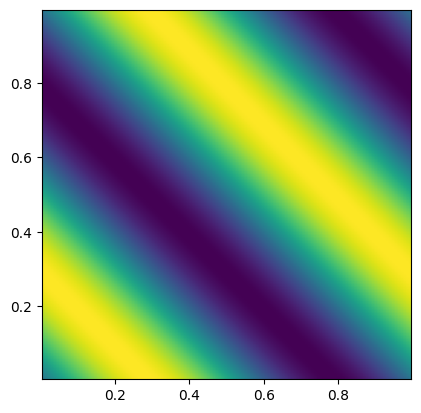

In [3]:
sim = OutputLoader(f"{base_path}MUSCL-Hancock/N_128")
fig, ax = plt.subplots()
plot_2d_slice(sim, ax, "E", cell_averaged=True)

In [4]:
update_rate_cache = {}

Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_32"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_64"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_128"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_256"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_512"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_1024"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_2048"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/MUSCL-Hancock/N_32"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/MUSCL-Hancock/N_64"
Successfully read simulation output

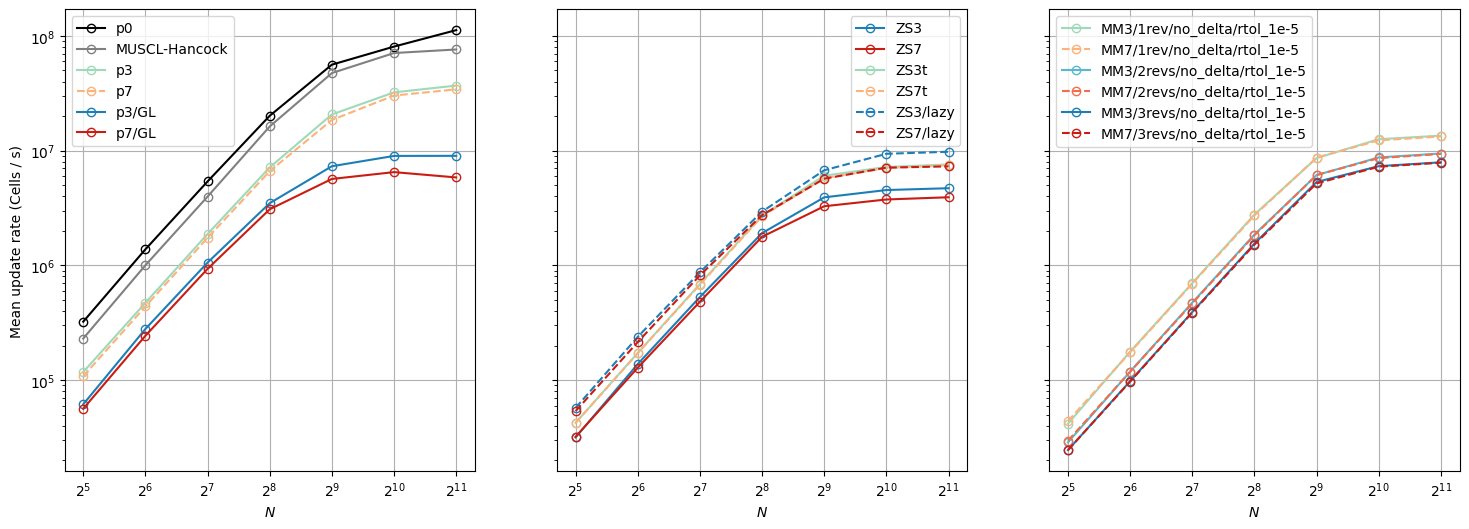

In [5]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(18, 6))
axs[0].set_xscale("log", base=2)
axs[0].set_yscale("log")
axs[0].set_ylabel("Mean update rate (Cells / s)")
for i in range(3):
    axs[i].set_xlabel(r"$N$")
    axs[i].grid()


def plot_timings(name, ax, style):
    timings = []
    for N in N_values:
        sim_path = f"{base_path}{name}/N_{N}"
        if sim_path in update_rate_cache:
            mean_update_rate = update_rate_cache[sim_path]
        else:
            sim = OutputLoader(f"{base_path}{name}/N_{N}")
            mean_update_rate = np.mean(sim.minisnapshots["update_rate"][1:])
            update_rate_cache[sim_path] = mean_update_rate
        timings.append(mean_update_rate)
    ax.plot(N_values, timings, label=name, **style)


common = dict(marker="o", mfc="none")
cmap1 = plt.get_cmap("GnBu")
cmap2 = plt.get_cmap("OrRd")

plot_timings("p0", axs[0], dict(color="k", **common))
plot_timings("MUSCL-Hancock", axs[0], dict(color="grey", **common))
plot_timings("p3", axs[0], dict(color=cmap1(0.4), **common))
plot_timings("p7", axs[0], dict(color=cmap2(0.4), linestyle="--", **common))
plot_timings("p3/GL", axs[0], dict(color=cmap1(0.8), **common))
plot_timings("p7/GL", axs[0], dict(color=cmap2(0.8), **common))

plot_timings("ZS3", axs[1], dict(color=cmap1(0.8), **common))
plot_timings("ZS7", axs[1], dict(color=cmap2(0.8), **common))
plot_timings("ZS3t", axs[1], dict(color=cmap1(0.4), **common))
plot_timings("ZS7t", axs[1], dict(color=cmap2(0.4), linestyle="--", **common))
plot_timings("ZS3/lazy", axs[1], dict(color=cmap1(0.8), linestyle="--", **common))
plot_timings("ZS7/lazy", axs[1], dict(color=cmap2(0.8), linestyle="--", **common))

plot_timings("MM3/1rev/no_delta/rtol_1e-5", axs[2], dict(color=cmap1(0.4), **common))
plot_timings(
    "MM7/1rev/no_delta/rtol_1e-5",
    axs[2],
    dict(color=cmap2(0.4), linestyle="--", **common),
)
plot_timings("MM3/2revs/no_delta/rtol_1e-5", axs[2], dict(color=cmap1(0.6), **common))
plot_timings(
    "MM7/2revs/no_delta/rtol_1e-5",
    axs[2],
    dict(color=cmap2(0.6), linestyle="--", **common),
)
plot_timings("MM3/3revs/no_delta/rtol_1e-5", axs[2], dict(color=cmap1(0.8), **common))
plot_timings(
    "MM7/3revs/no_delta/rtol_1e-5",
    axs[2],
    dict(color=cmap2(0.8), linestyle="--", **common),
)

for i in range(3):
    axs[i].legend()

In [6]:
fig.savefig("update_rates.pdf", bbox_inches="tight")

In [7]:
riemann_rate_cache = {}

Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_32"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_64"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_128"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_256"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_512"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_1024"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_2048"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/MUSCL-Hancock/N_32"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/MUSCL-Hancock/N_64"
Successfully read simulation output

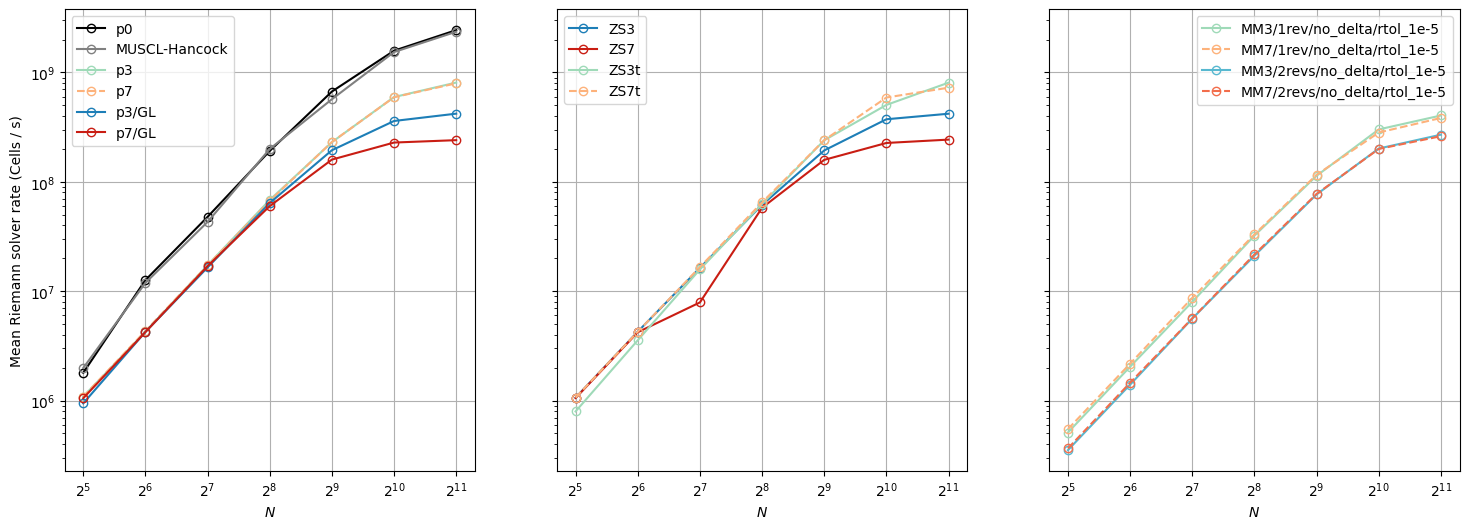

In [8]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(18, 6))
axs[0].set_xscale("log", base=2)
axs[0].set_yscale("log")
axs[0].set_ylabel("Mean Riemann solver rate (Cells / s)")
for i in range(3):
    axs[i].set_xlabel(r"$N$")
    axs[i].grid()


def plot_timings(name, ax, style):
    timings = []
    for N in N_values:
        sim_path = f"{base_path}{name}/N_{N}"
        if sim_path in riemann_rate_cache:
            mean_riemann_rate = riemann_rate_cache[sim_path]
        else:
            sim = OutputLoader(f"{base_path}{name}/N_{N}")
            riemann_times = [
                timer.data["riemann_solver"].cum_time
                for timer in sim.minisnapshots["stepper_timer"]
            ]
            mean_riemann_rate = N * N / np.mean(np.array(riemann_times[1:]))
            riemann_rate_cache[sim_path] = mean_riemann_rate
        timings.append(mean_riemann_rate)
    ax.plot(N_values, timings, label=name, **style)


plot_timings("p0", axs[0], dict(color="k", **common))
plot_timings("MUSCL-Hancock", axs[0], dict(color="grey", **common))
plot_timings("p3", axs[0], dict(color=cmap1(0.4), **common))
plot_timings("p7", axs[0], dict(color=cmap2(0.4), linestyle="--", **common))
plot_timings("p3/GL", axs[0], dict(color=cmap1(0.8), **common))
plot_timings("p7/GL", axs[0], dict(color=cmap2(0.8), **common))

plot_timings("ZS3", axs[1], dict(color=cmap1(0.8), **common))
plot_timings("ZS7", axs[1], dict(color=cmap2(0.8), **common))
plot_timings("ZS3t", axs[1], dict(color=cmap1(0.4), **common))
plot_timings("ZS7t", axs[1], dict(color=cmap2(0.4), linestyle="--", **common))

plot_timings("MM3/1rev/no_delta/rtol_1e-5", axs[2], dict(color=cmap1(0.4), **common))
plot_timings(
    "MM7/1rev/no_delta/rtol_1e-5",
    axs[2],
    dict(color=cmap2(0.4), linestyle="--", **common),
)
plot_timings("MM3/2revs/no_delta/rtol_1e-5", axs[2], dict(color=cmap1(0.6), **common))
plot_timings(
    "MM7/2revs/no_delta/rtol_1e-5",
    axs[2],
    dict(color=cmap2(0.6), linestyle="--", **common),
)

for i in range(3):
    axs[i].legend()

In [9]:
fig.savefig("riemann_rates.pdf", bbox_inches="tight")

In [10]:
limiter_rate_cache = {}

Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_32"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_64"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_128"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_256"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_512"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_1024"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/p0/N_2048"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/MUSCL-Hancock/N_32"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/timing-of-2d-sine-wave/cupy/MUSCL-Hancock/N_64"
Successfully read simulation output

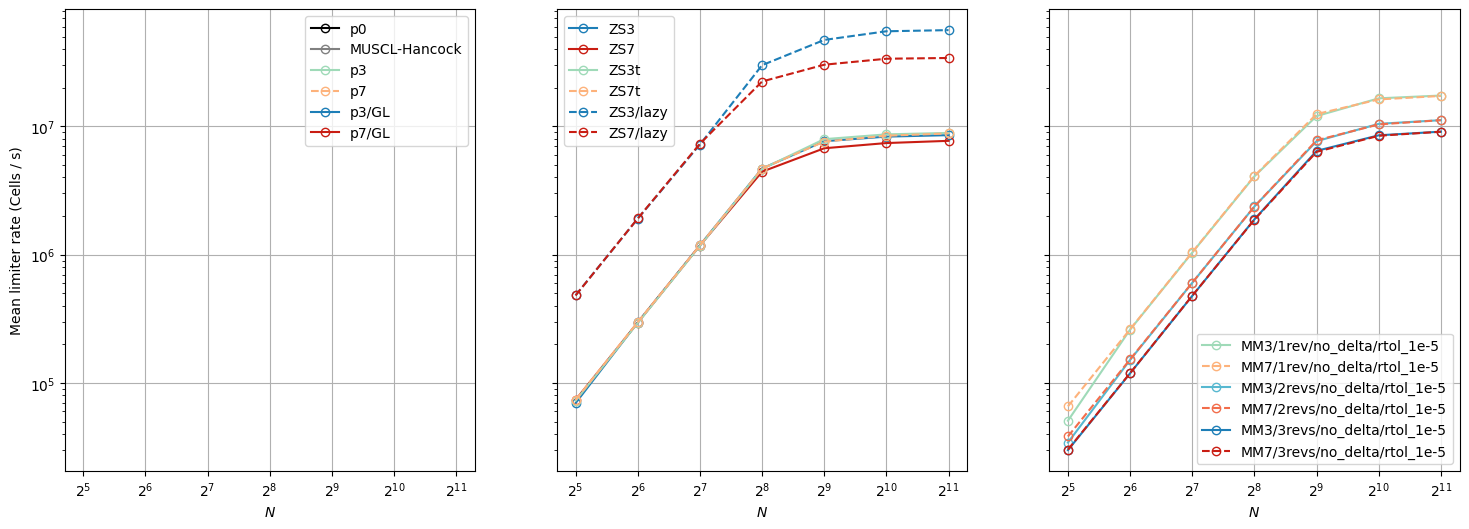

In [11]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(18, 6))
axs[0].set_xscale("log", base=2)
axs[0].set_yscale("log")
axs[0].set_ylabel("Mean limiter rate (Cells / s)")
for i in range(3):
    axs[i].set_xlabel(r"$N$")
    axs[i].grid()


def plot_timings(name, ax, limiter, style):
    timings = []
    for N in N_values:
        sim_path = f"{base_path}{name}/N_{N}"
        if sim_path in limiter_rate_cache:
            mean_limiter_rate = limiter_rate_cache[sim_path]
        else:
            sim = OutputLoader(f"{base_path}{name}/N_{N}")

            if limiter == "none" or limiter == "muscl":
                riemann_times = [
                    timer.data["riemann_solver"].cum_time
                    for timer in sim.minisnapshots["stepper_timer"]
                ]
                limiter_times = 0.0 * np.array(riemann_times)
            elif limiter == "zs":
                zs_times = [
                    timer.data["zhang_shu_limiter"].cum_time
                    for timer in sim.minisnapshots["stepper_timer"]
                ]
                shock_detector_times = [
                    timer.data["shock_detector"].cum_time
                    for timer in sim.minisnapshots["stepper_timer"]
                ]
                limiter_times = np.array(zs_times) + np.array(shock_detector_times)
            elif limiter == "mood":
                limiter_times = np.array(
                    [
                        timer.data["MOOD_loop"].cum_time
                        for timer in sim.minisnapshots["stepper_timer"]
                    ]
                )
            else:
                raise ValueError(f"Unknown limiter: {limiter}")

            mean_limiter_rate = N * N / np.mean(limiter_times[1:])
            limiter_rate_cache[sim_path] = mean_limiter_rate
        timings.append(mean_limiter_rate)
    ax.plot(N_values, timings, label=name, **style)


plot_timings("p0", axs[0], "none", dict(color="k", **common))
plot_timings("MUSCL-Hancock", axs[0], "muscl", dict(color="grey", **common))
plot_timings("p3", axs[0], "none", dict(color=cmap1(0.4), **common))
plot_timings("p7", axs[0], "none", dict(color=cmap2(0.4), linestyle="--", **common))
plot_timings("p3/GL", axs[0], "none", dict(color=cmap1(0.8), **common))
plot_timings("p7/GL", axs[0], "none", dict(color=cmap2(0.8), **common))

plot_timings("ZS3", axs[1], "zs", dict(color=cmap1(0.8), **common))
plot_timings("ZS7", axs[1], "zs", dict(color=cmap2(0.8), **common))
plot_timings("ZS3t", axs[1], "zs", dict(color=cmap1(0.4), **common))
plot_timings("ZS7t", axs[1], "zs", dict(color=cmap2(0.4), linestyle="--", **common))
plot_timings("ZS3/lazy", axs[1], "zs", dict(color=cmap1(0.8), linestyle="--", **common))
plot_timings("ZS7/lazy", axs[1], "zs", dict(color=cmap2(0.8), linestyle="--", **common))

plot_timings(
    "MM3/1rev/no_delta/rtol_1e-5", axs[2], "mood", dict(color=cmap1(0.4), **common)
)
plot_timings(
    "MM7/1rev/no_delta/rtol_1e-5",
    axs[2],
    "mood",
    dict(color=cmap2(0.4), linestyle="--", **common),
)
plot_timings(
    "MM3/2revs/no_delta/rtol_1e-5", axs[2], "mood", dict(color=cmap1(0.6), **common)
)
plot_timings(
    "MM7/2revs/no_delta/rtol_1e-5",
    axs[2],
    "mood",
    dict(color=cmap2(0.6), linestyle="--", **common),
)
plot_timings(
    "MM3/3revs/no_delta/rtol_1e-5", axs[2], "mood", dict(color=cmap1(0.8), **common)
)
plot_timings(
    "MM7/3revs/no_delta/rtol_1e-5",
    axs[2],
    "mood",
    dict(color=cmap2(0.8), linestyle="--", **common),
)

for i in range(3):
    axs[i].legend()

In [12]:
fig.savefig("limiter_rates.pdf", bbox_inches="tight")